# Introduction

The goal of this project is to clean and prepare a dataset containing information on more than 12,700 wines. The dataset suffers from various data integrity and usability issues, including missing values and potential inconsistencies.

To address these issues, I will follow a structured approach:
1. Conduct exploratory data analysis (EDA) to understand the dataset's structure and quality.
2. Identify and address data integrity issues, such as missing values and outliers.
3. Perform data preparation steps, including data cleaning, transformation, and feature engineering.
4. Conduct a review of the prepped data to ensure that necessary adjustments have been made.

Let's begin by exploring the dataset.


# Exploratory Data Analysis (EDA)

In [1]:
# Importing required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import skew

In [2]:
# Importing data set
df=pd.read_csv('https://raw.githubusercontent.com/vivekuk/wines_data/main/M3_Data%20(2).csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


In [5]:
display(df.info(),df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

None

(12795, 16)

In [6]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [7]:
#Check for missing values
print(df.isnull().sum())

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


### Data Distribution

<Axes: xlabel='TARGET', ylabel='Density'>

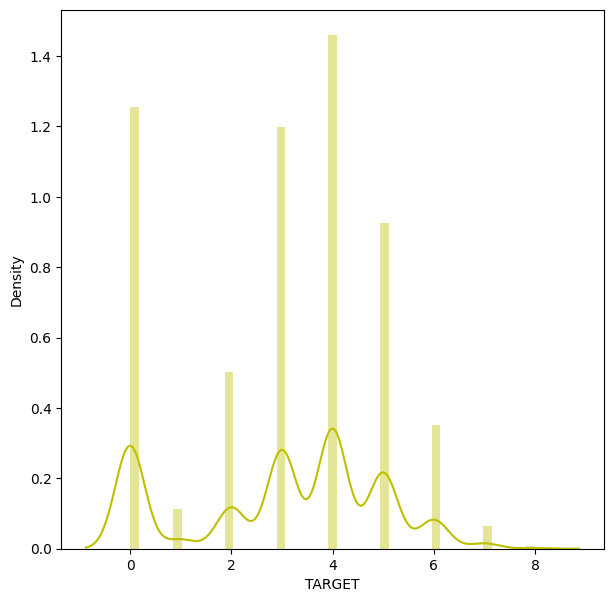

In [8]:
# Dependent variable 'TARGET'
plt.figure(figsize=(7,7))
sns.distplot(df['TARGET'],color="y")

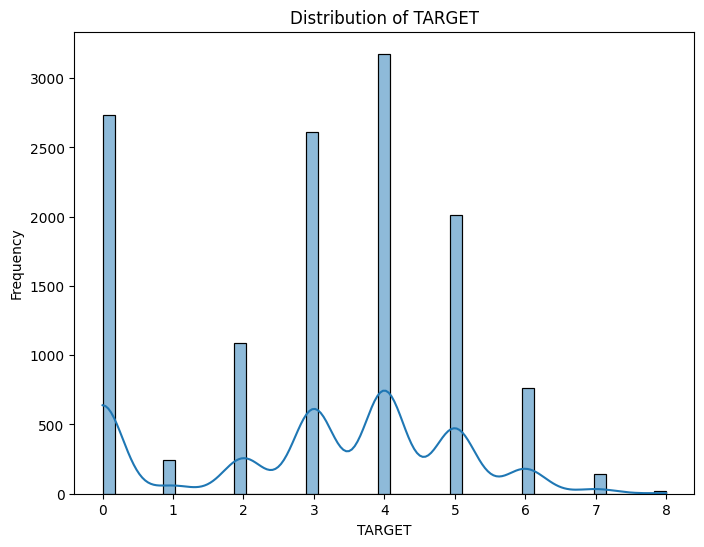

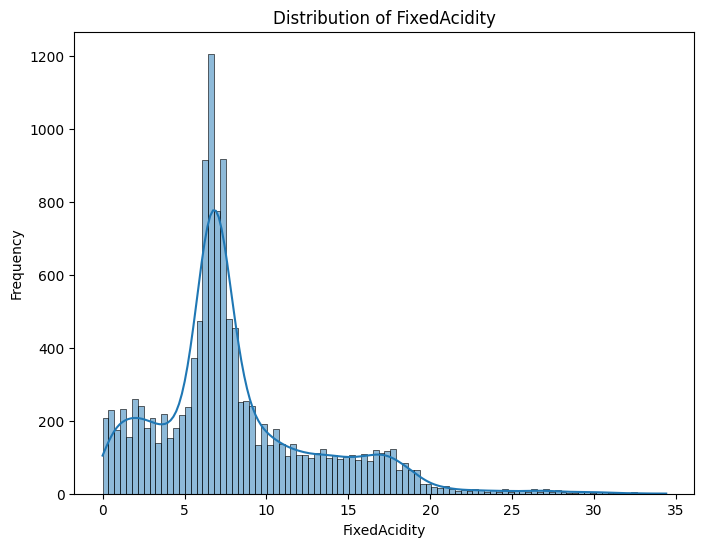

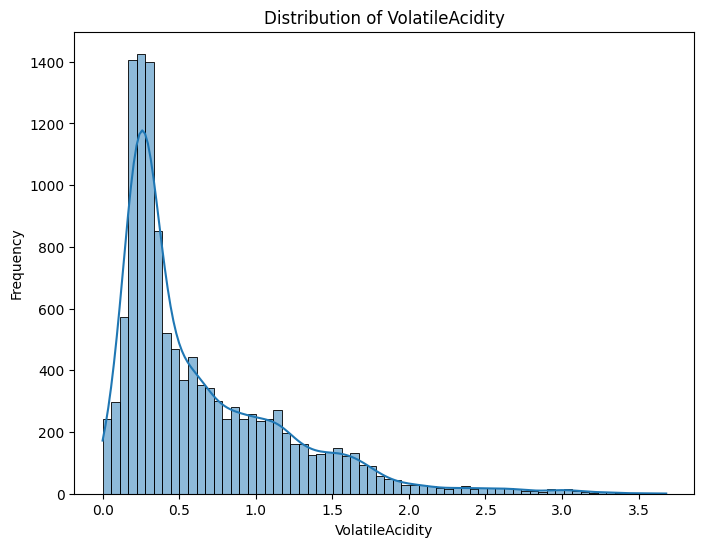

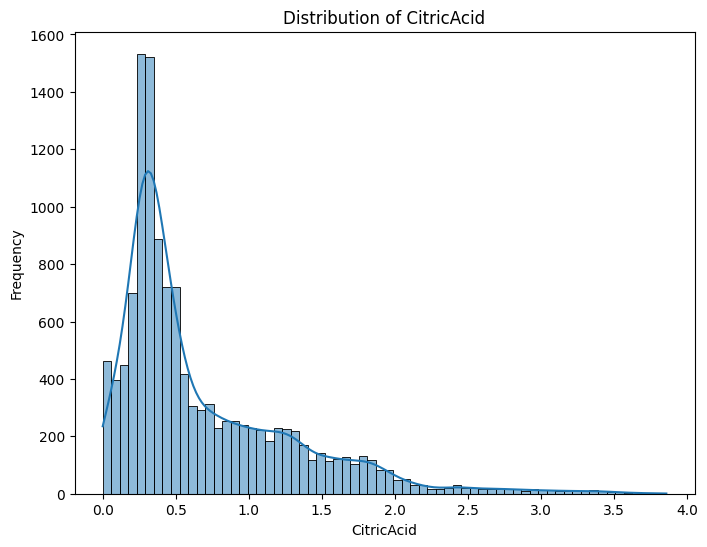

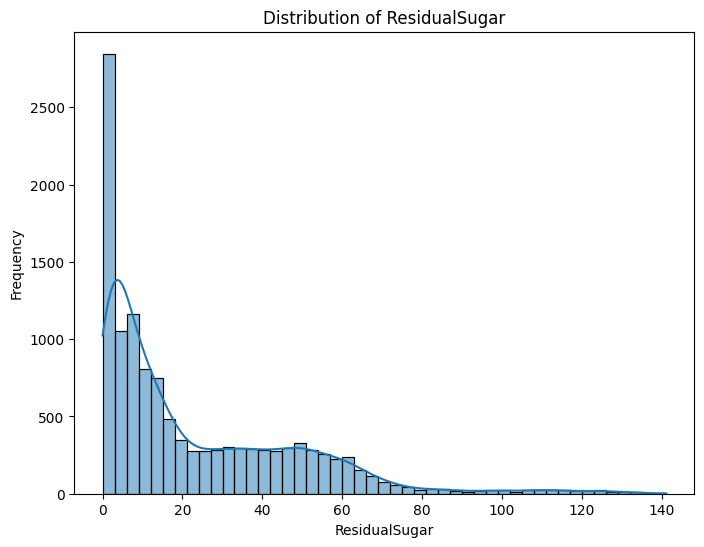

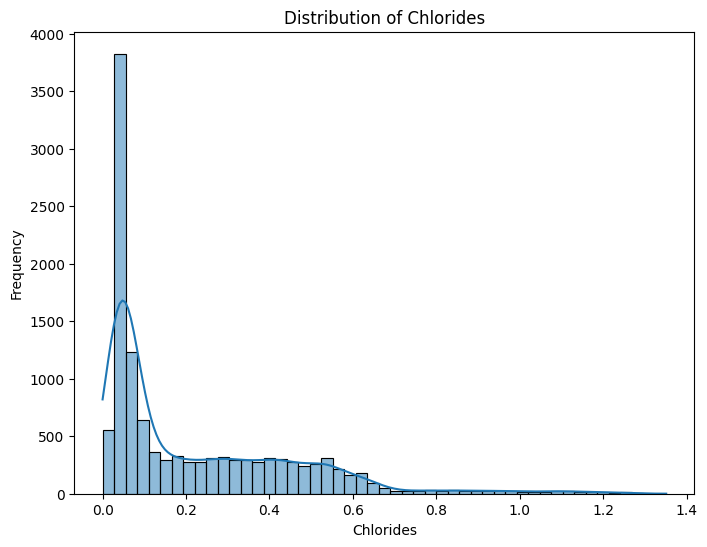

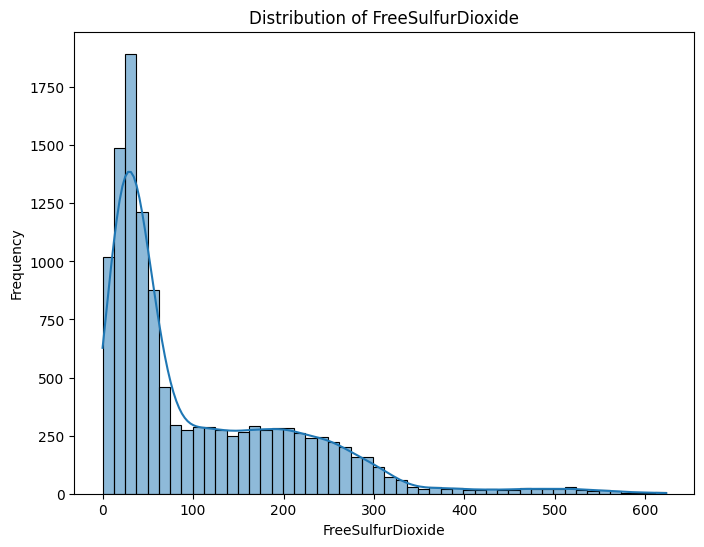

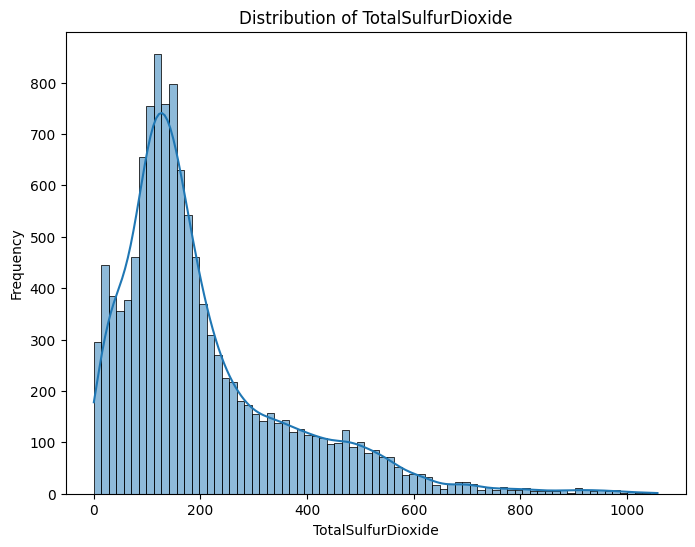

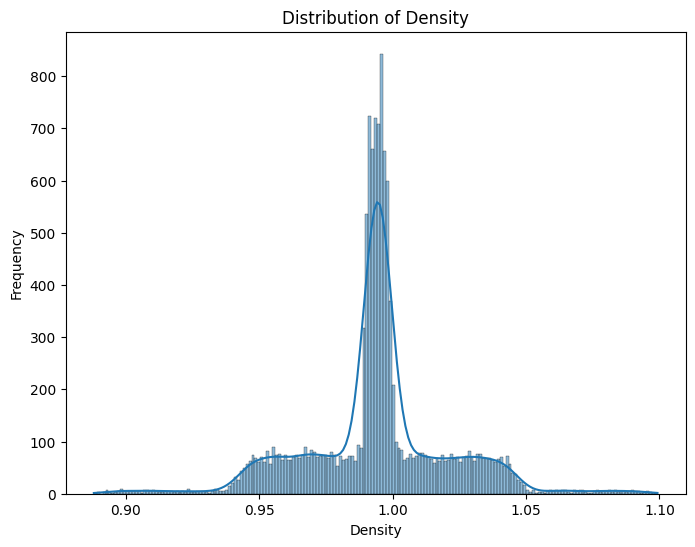

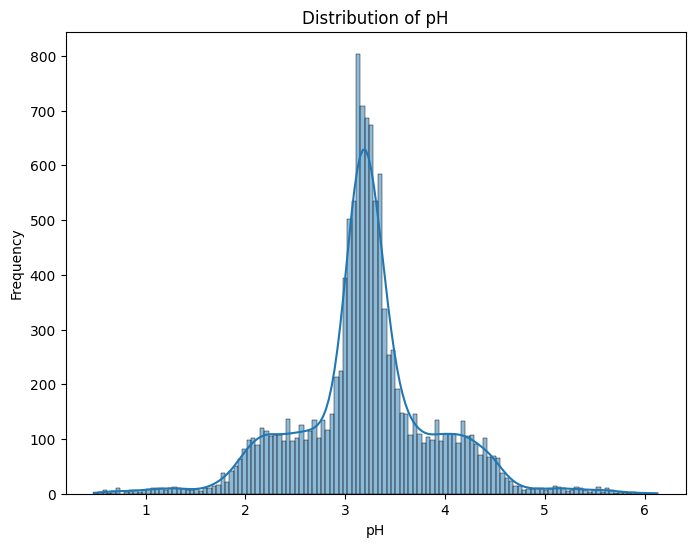

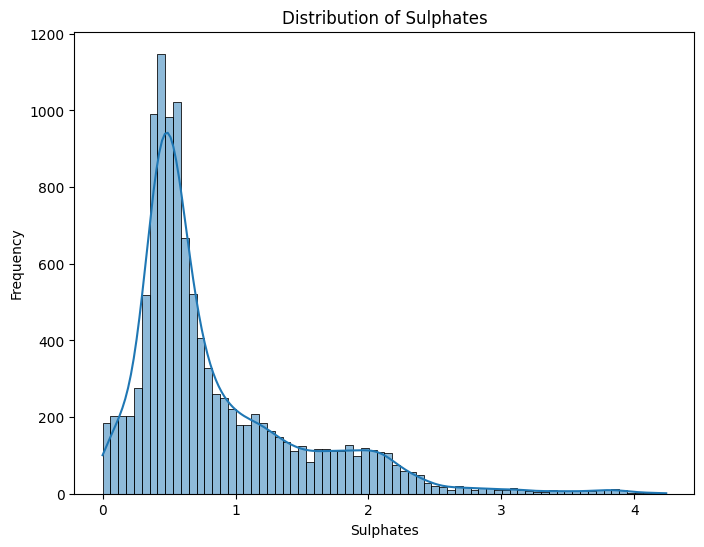

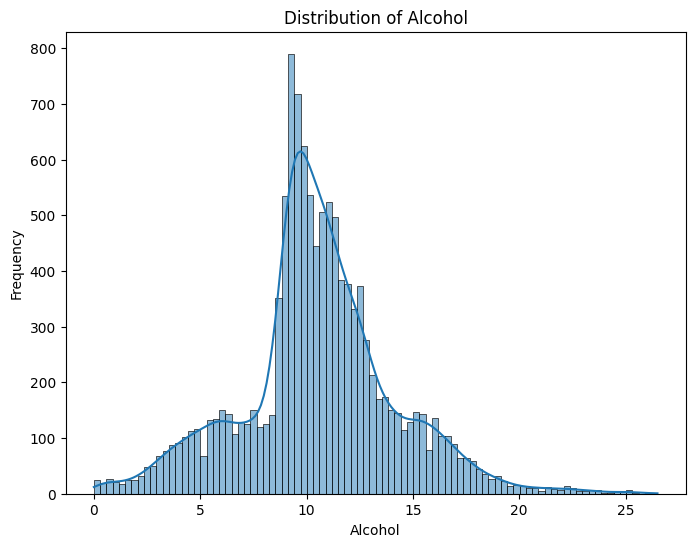

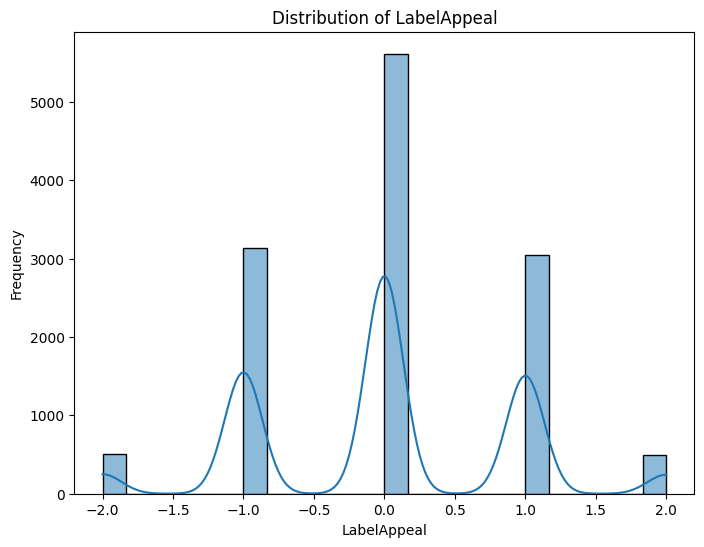

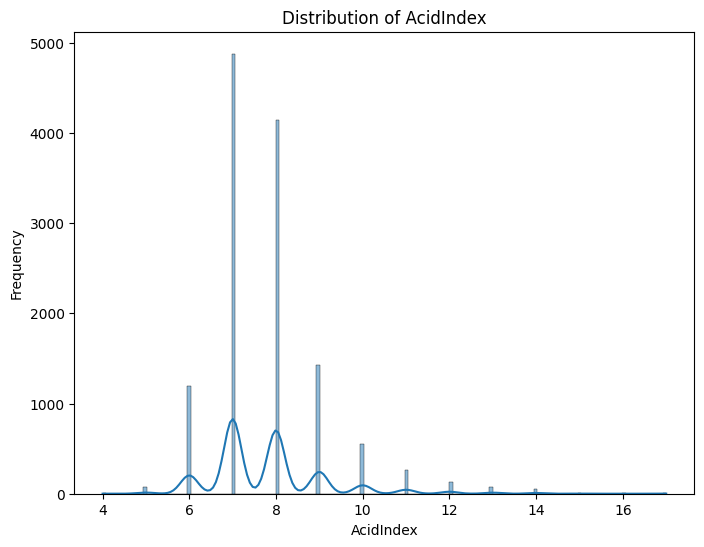

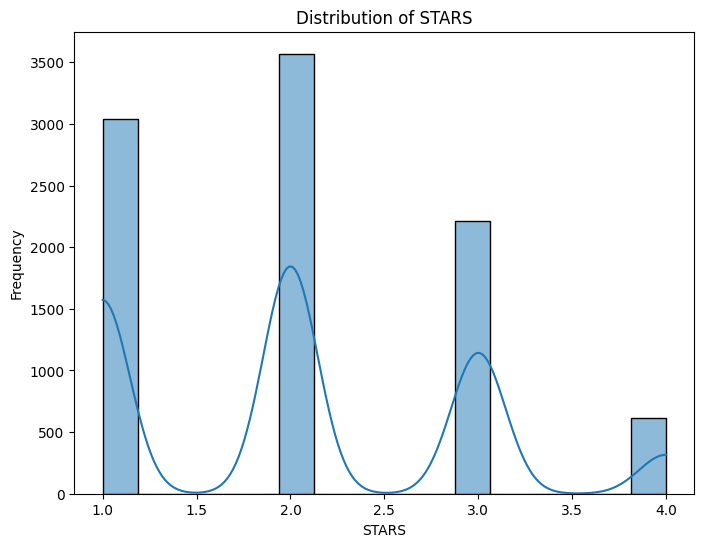

In [9]:
for column in df.select_dtypes(include=['float64', 'int64']).columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
# Returns boolean series denoting duplicate rows
df[df.duplicated()]

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS


There are no duplicate rows

# Data Preparation

### Null values Treatment

In [11]:
# Checking null values present in the data:
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

As we can see ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, pH, Sulphates, Alcohol,     
STARS, variables are having null values.

In [12]:
# Preparing a function that returns information on missing values

def check_miss(data):
    cnull=[sum(data[y].isnull()) for y in data.columns]
    miss=pd.DataFrame({'Col_name':data.columns,'Null Values':
                        [any(data[x].isnull()) for x in data.columns],
                    'Count_Nulls':cnull,
                    'Percentage_Nulls':list((np.array(cnull)*100)/data.shape[0]),
                    'DataType':list(data[x].dtype for x in data.columns)
                      })
    return miss.sort_values(by='Count_Nulls',ascending=False)

In [13]:
miss_vals = check_miss(df)
miss_vals

,Col_name,Null Values,Count_Nulls,Percentage_Nulls,DataType
15,STARS,True,3359,26.252442,float64
11,Sulphates,True,1210,9.456819,float64
8,TotalSulfurDioxide,True,682,5.330207,float64
12,Alcohol,True,653,5.103556,float64
7,FreeSulfurDioxide,True,647,5.056663,float64
6,Chlorides,True,638,4.986323,float64
5,ResidualSugar,True,616,4.814381,float64
10,pH,True,395,3.087143,float64
0,INDEX,False,0,0.000000,int64
1,TARGET,False,0,0.000000,int64


Returns a sorted DataFrame that contains information about missing values in each column.

Null Values: Either the column has null values or not.

Count_Nulls: Number of null values.

Percentage_Nulls: Percentage of null values

In [14]:
df2 = miss_vals[miss_vals['Count_Nulls'].values > 0]

def change_null(df):
    for val in df2['Col_name']:
        df[val].fillna(df[val].mean(),inplace=True)

In [15]:
change_null(df)

In [16]:
# checking missing values after replacing.
check_miss(df)

,Col_name,Null Values,Count_Nulls,Percentage_Nulls,DataType
0,INDEX,False,0,0.0,int64
1,TARGET,False,0,0.0,int64
2,FixedAcidity,False,0,0.0,float64
3,VolatileAcidity,False,0,0.0,float64
4,CitricAcid,False,0,0.0,float64
5,ResidualSugar,False,0,0.0,float64
6,Chlorides,False,0,0.0,float64
7,FreeSulfurDioxide,False,0,0.0,float64
8,TotalSulfurDioxide,False,0,0.0,float64
9,Density,False,0,0.0,float64


In [17]:
# Analysis of data with mean, standard deviation, median and Quartile ranges.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
INDEX,12795.0,8069.980305,4656.905107,1.00000,4037.50000,8110.000000,12106.500000,16129.00000
TARGET,12795.0,3.029074,1.926368,0.00000,2.00000,3.000000,4.000000,8.00000
FixedAcidity,12795.0,8.063251,4.996119,0.00000,5.60000,7.000000,9.800000,34.40000
VolatileAcidity,12795.0,0.641086,0.555614,0.00000,0.25000,0.410000,0.910000,3.68000
CitricAcid,12795.0,0.686315,0.606005,0.00000,0.28000,0.440000,0.970000,3.86000
ResidualSugar,12795.0,23.367809,24.337722,0.00000,4.00000,14.200000,37.200000,141.15000
Chlorides,12795.0,0.222559,0.228371,0.00000,0.04600,0.120000,0.353000,1.35100
FreeSulfurDioxide,12795.0,106.679042,105.333826,0.00000,29.00000,61.000000,164.000000,623.00000
TotalSulfurDioxide,12795.0,204.319120,158.709771,0.00000,102.00000,160.000000,251.000000,1057.00000
Density,12795.0,0.994203,0.026538,0.88809,0.98772,0.994490,1.000515,1.09924


### Outlier analysis

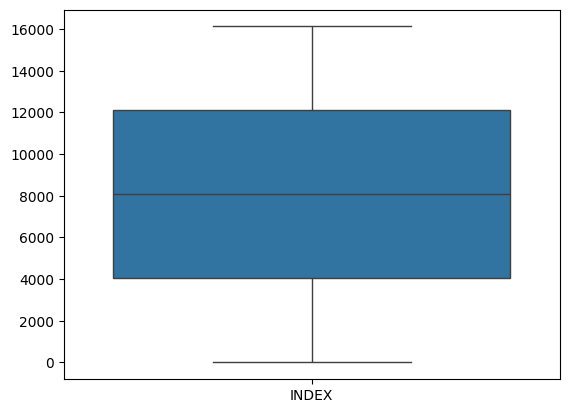

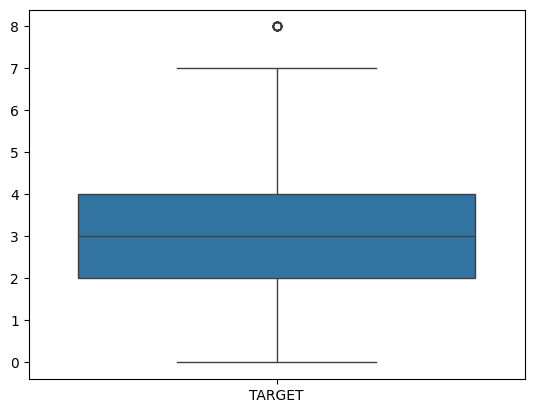

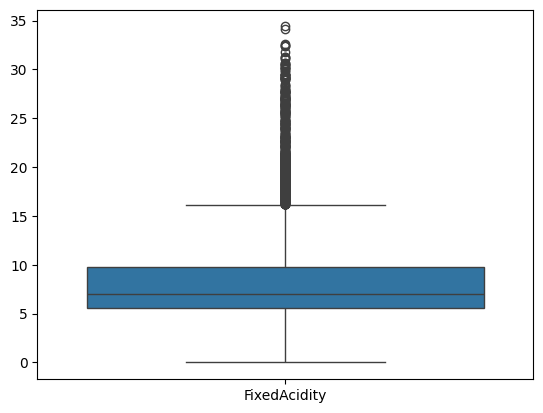

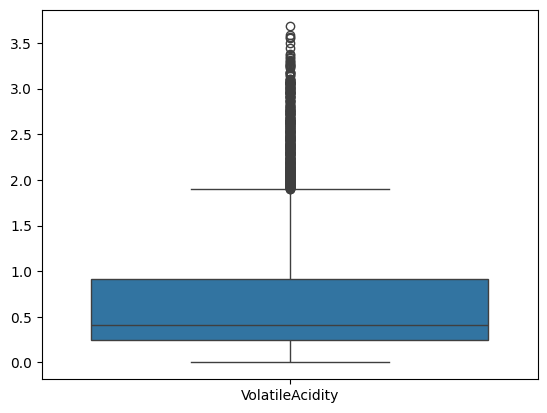

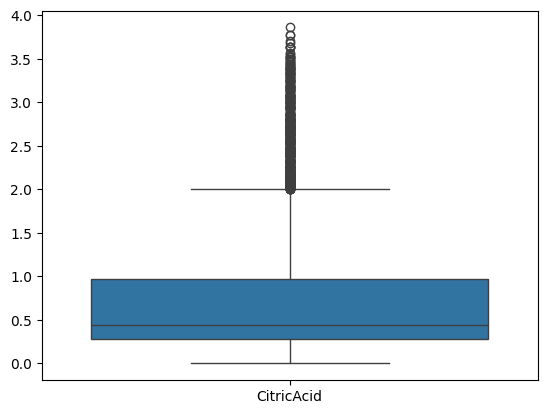

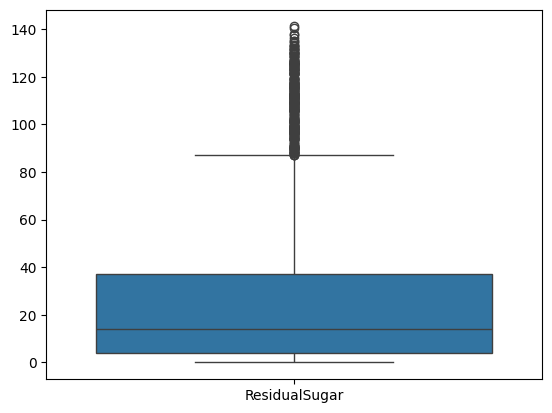

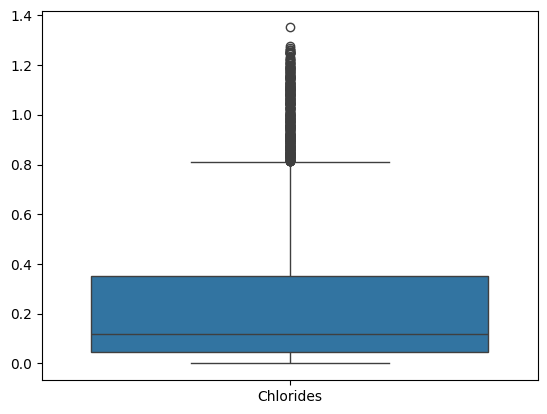

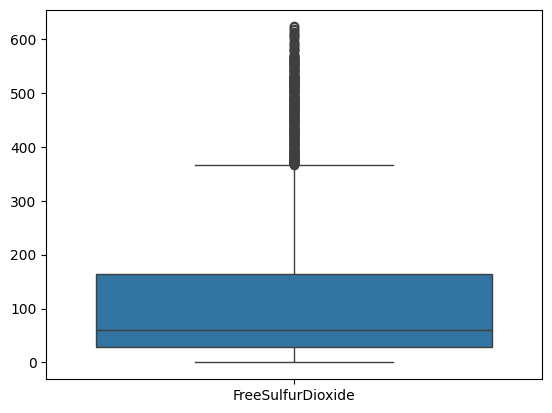

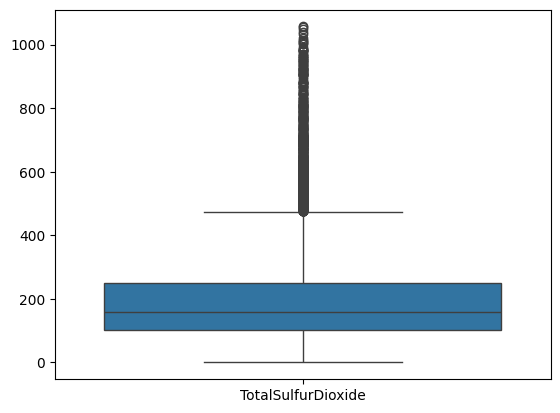

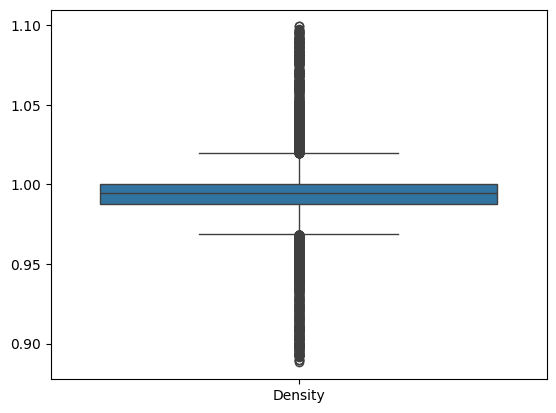

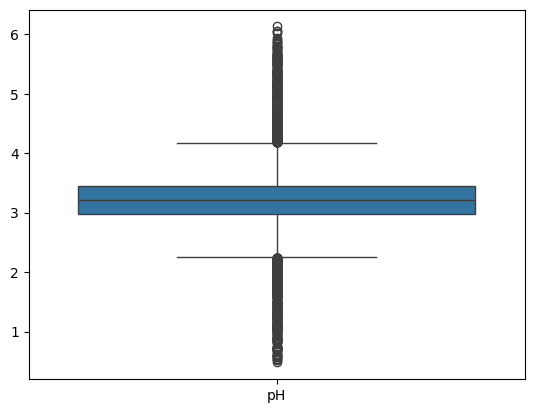

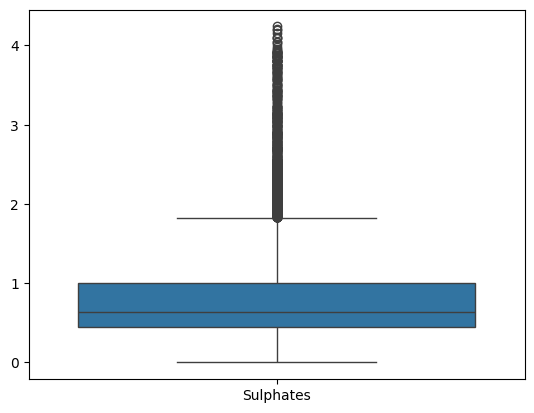

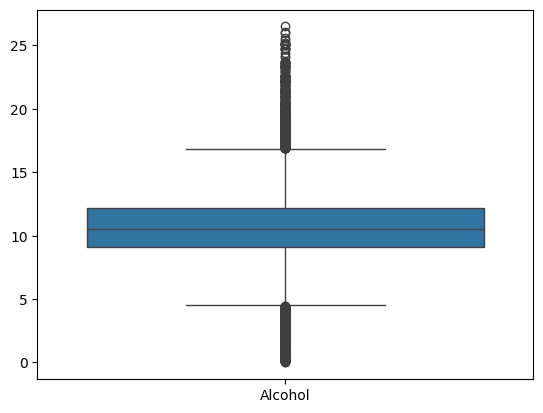

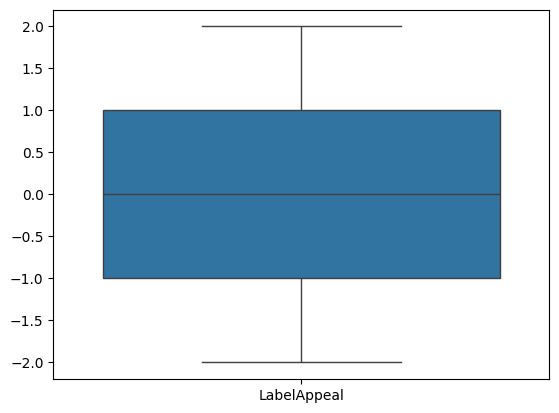

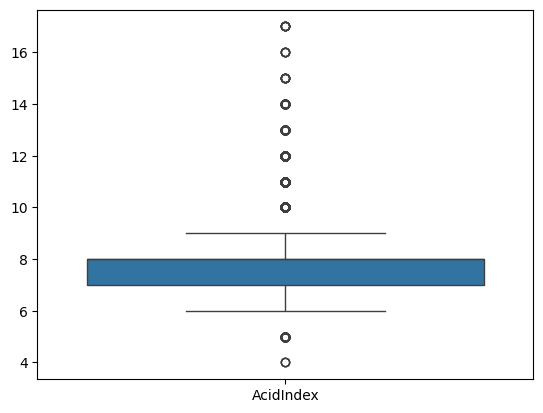

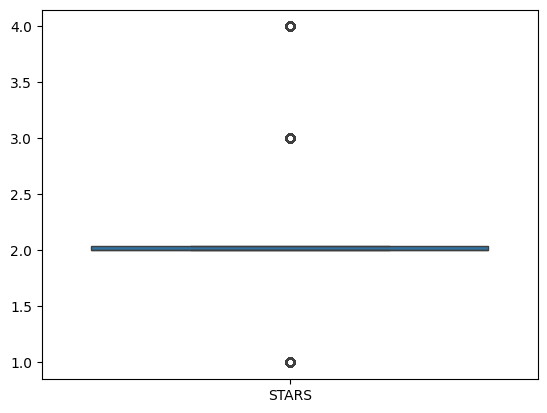

In [18]:
for i in df[:-1]:
    sns.boxplot(data=df[[i]])
    plt.show()
print()

In [19]:
df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.200000,0.567000,106.679042,268.00000,0.99280,3.33,0.590000,9.900000,0,8,2.000000
1,2,3,4.5,0.160,0.81,26.100000,0.425000,15.000000,327.00000,1.02792,3.38,0.700000,10.523778,-1,7,3.000000
2,4,5,7.1,2.640,0.88,14.800000,0.037000,214.000000,142.00000,0.99518,3.12,0.480000,22.000000,-1,8,3.000000
3,5,3,5.7,0.385,0.04,18.800000,0.425000,22.000000,115.00000,0.99640,2.24,1.830000,6.200000,-1,6,1.000000
4,6,4,8.0,0.330,1.26,9.400000,0.222559,167.000000,108.00000,0.99457,3.12,1.770000,13.700000,0,9,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.000000,0.043000,17.000000,101.00000,1.01077,3.39,0.570000,4.900000,1,5,2.041755
12791,16123,5,8.9,0.470,0.29,84.900000,0.259000,54.000000,204.31912,0.99518,4.46,1.200000,10.523778,-1,8,2.000000
12792,16127,4,6.0,0.170,1.10,37.000000,0.078000,25.000000,108.00000,0.99076,3.25,0.846668,12.300000,0,6,2.000000
12793,16128,3,7.7,0.320,0.12,23.367809,0.029000,26.000000,274.00000,0.99060,3.97,0.620000,11.000000,-1,6,2.000000


### Correlation analysis

<Axes: >

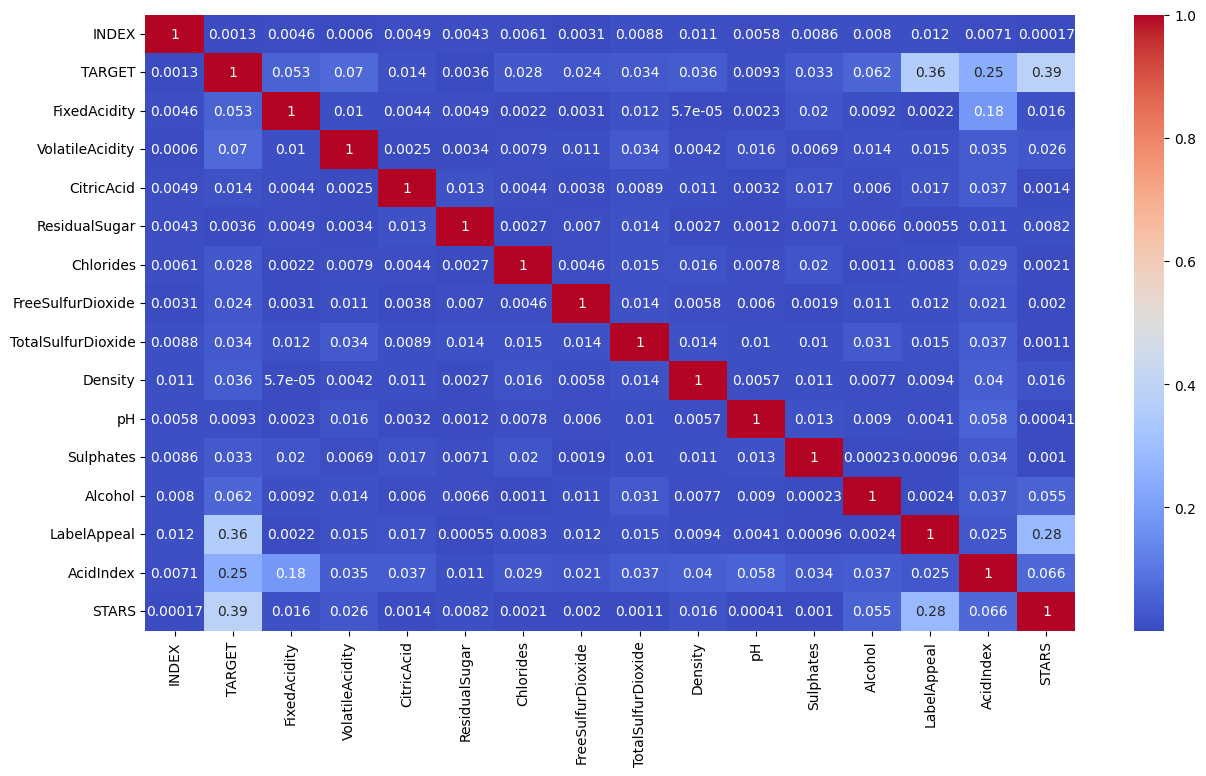

In [20]:
## correlation
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation),annot= True,cmap='coolwarm')

In [21]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [22]:
calc_vif(df[[i for i in df.describe().columns if i not in ['charges']]])

,variables,VIF
0,INDEX,3.992641
1,TARGET,4.767574
2,FixedAcidity,3.726332
3,VolatileAcidity,2.345369
4,CitricAcid,2.286854
5,ResidualSugar,1.921883
6,Chlorides,1.954339
7,FreeSulfurDioxide,2.027610
8,TotalSulfurDioxide,2.672167
9,Density,94.790092


In [23]:
df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.200000,0.567000,106.679042,268.00000,0.99280,3.33,0.590000,9.900000,0,8,2.000000
1,2,3,4.5,0.160,0.81,26.100000,0.425000,15.000000,327.00000,1.02792,3.38,0.700000,10.523778,-1,7,3.000000
2,4,5,7.1,2.640,0.88,14.800000,0.037000,214.000000,142.00000,0.99518,3.12,0.480000,22.000000,-1,8,3.000000
3,5,3,5.7,0.385,0.04,18.800000,0.425000,22.000000,115.00000,0.99640,2.24,1.830000,6.200000,-1,6,1.000000
4,6,4,8.0,0.330,1.26,9.400000,0.222559,167.000000,108.00000,0.99457,3.12,1.770000,13.700000,0,9,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.000000,0.043000,17.000000,101.00000,1.01077,3.39,0.570000,4.900000,1,5,2.041755
12791,16123,5,8.9,0.470,0.29,84.900000,0.259000,54.000000,204.31912,0.99518,4.46,1.200000,10.523778,-1,8,2.000000
12792,16127,4,6.0,0.170,1.10,37.000000,0.078000,25.000000,108.00000,0.99076,3.25,0.846668,12.300000,0,6,2.000000
12793,16128,3,7.7,0.320,0.12,23.367809,0.029000,26.000000,274.00000,0.99060,3.97,0.620000,11.000000,-1,6,2.000000


In [24]:
display(df.info(),df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12795 non-null  float64
 6   Chlorides           12795 non-null  float64
 7   FreeSulfurDioxide   12795 non-null  float64
 8   TotalSulfurDioxide  12795 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12795 non-null  float64
 11  Sulphates           12795 non-null  float64
 12  Alcohol             12795 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               12795 non-null  float64
dtypes: f

None

(12795, 16)

### Data visualization

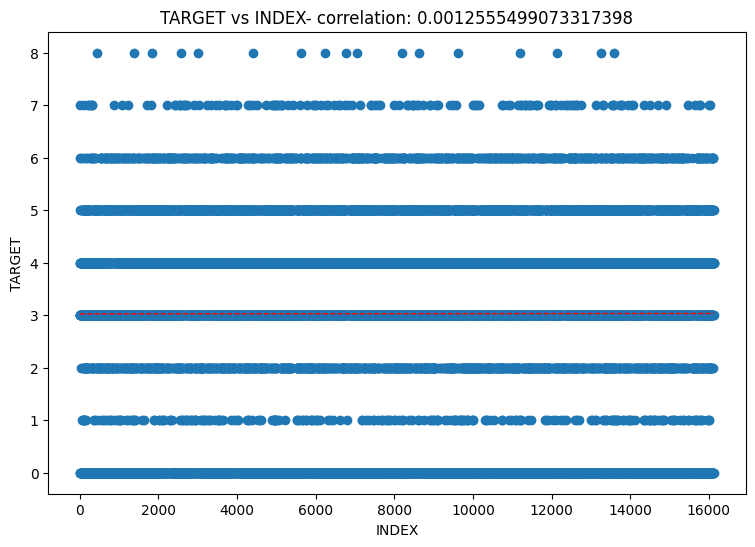

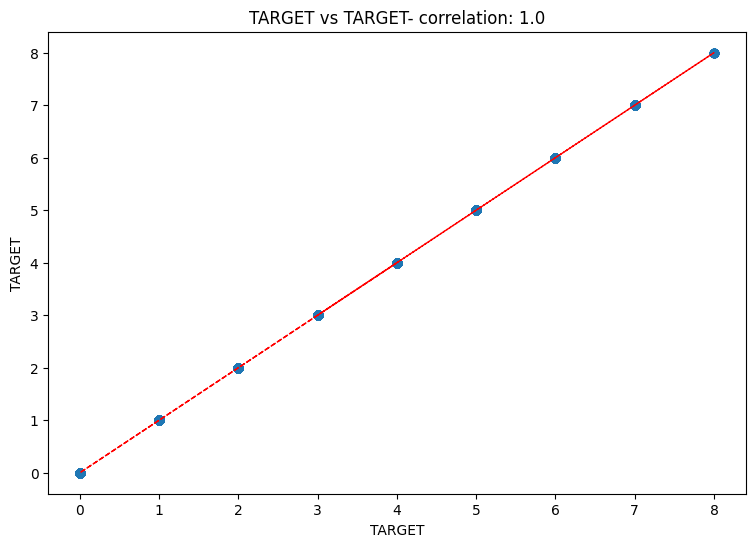

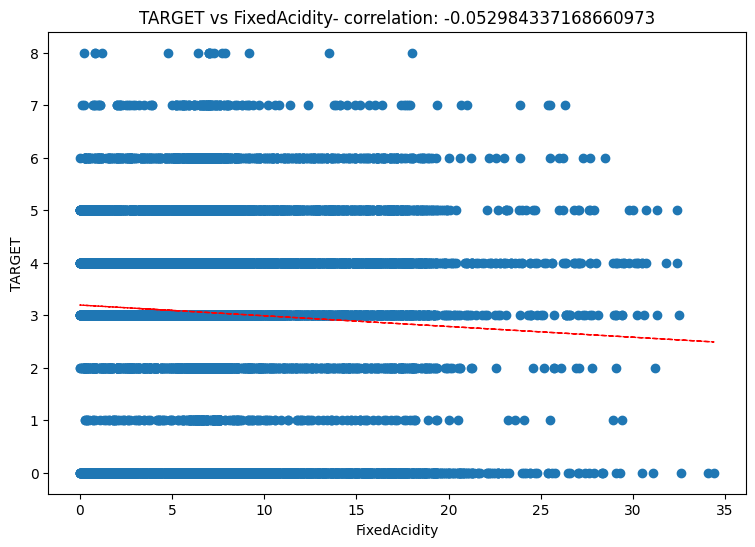

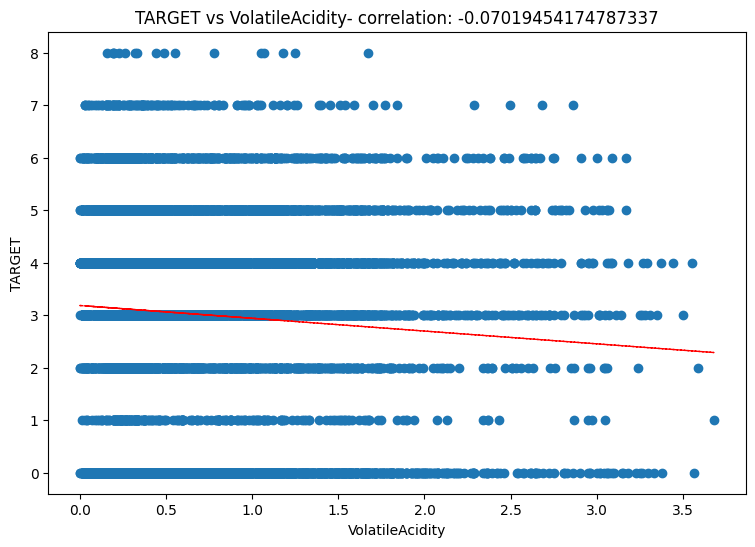

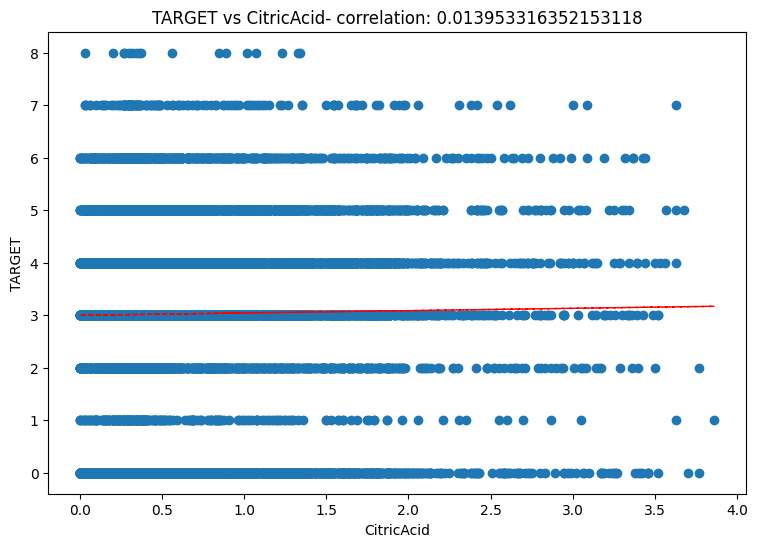

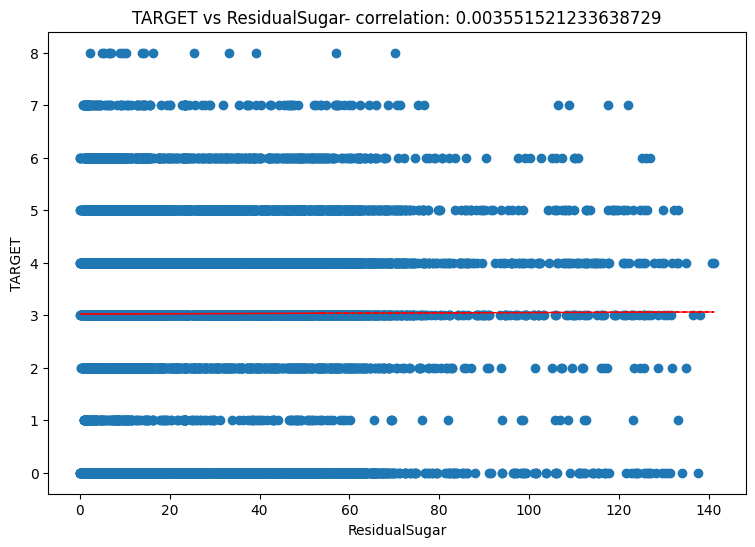

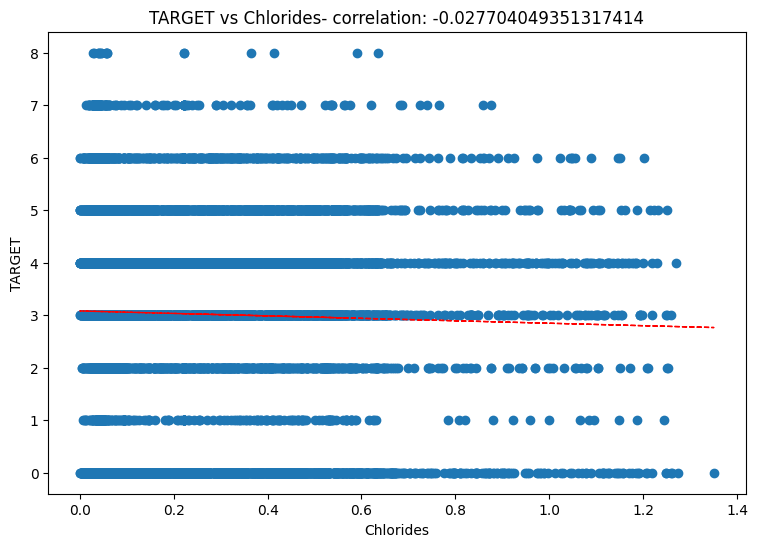

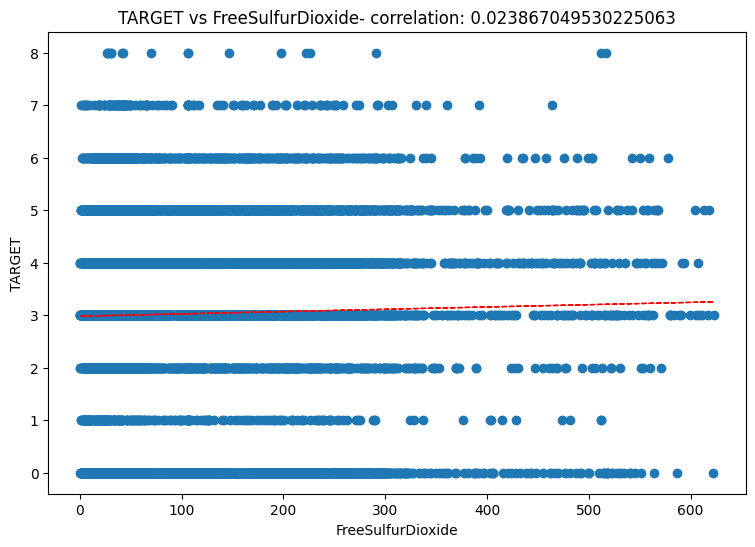

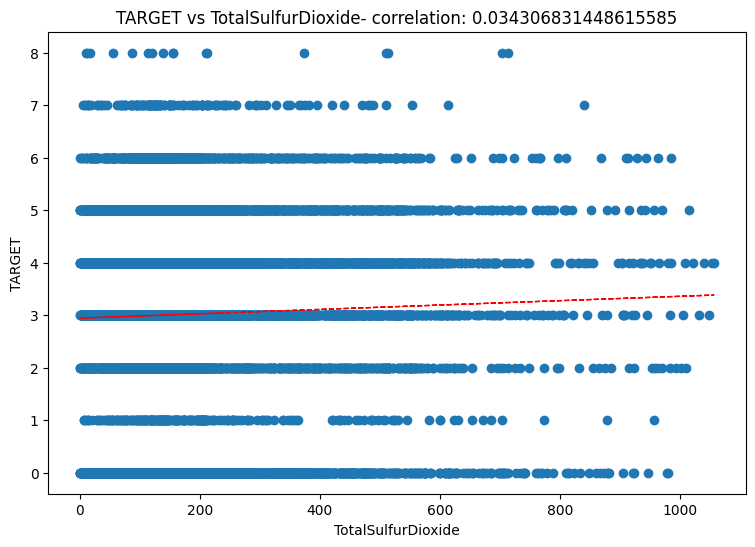

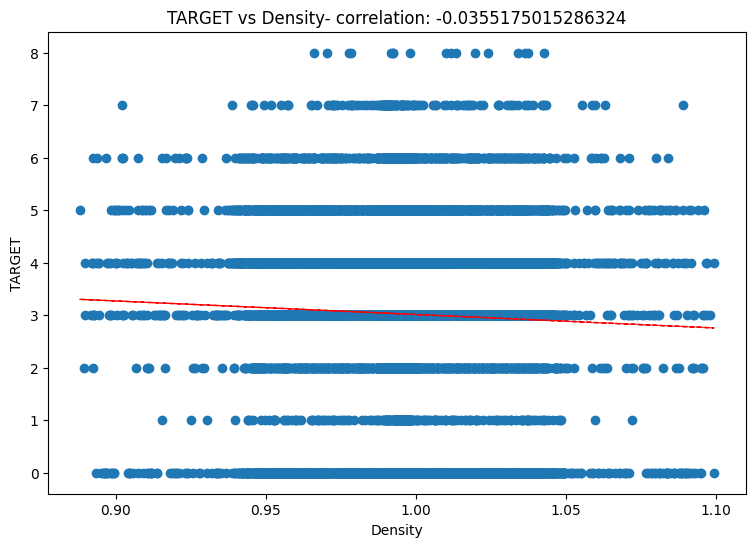

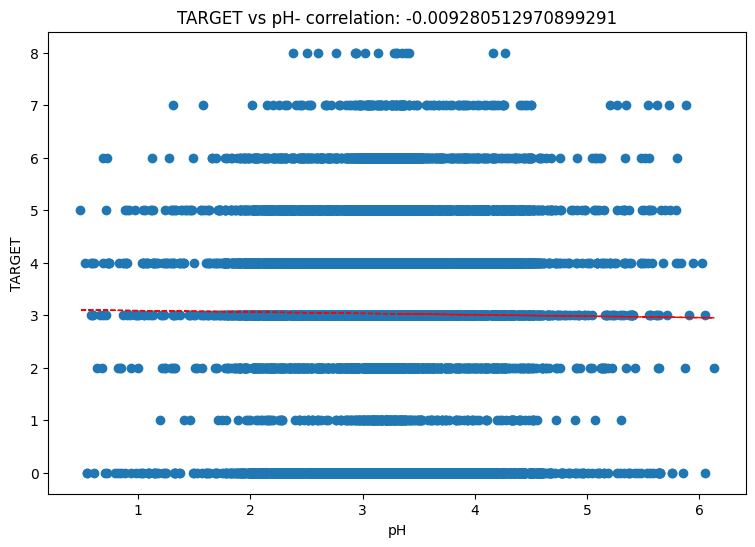

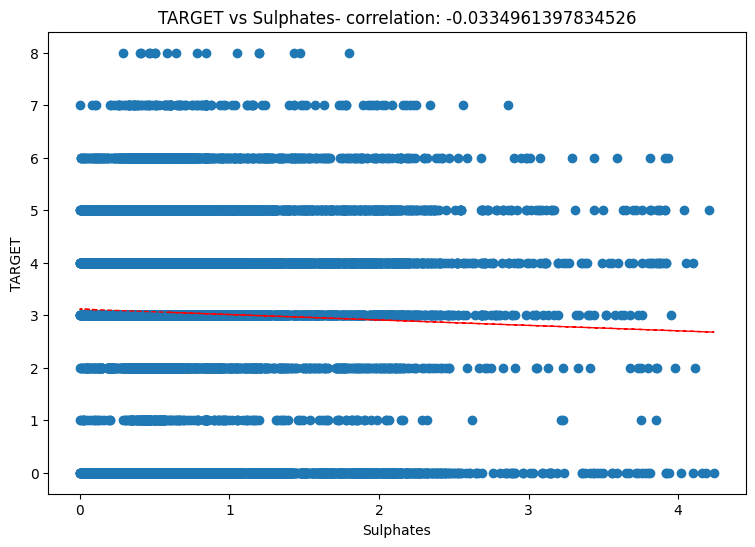

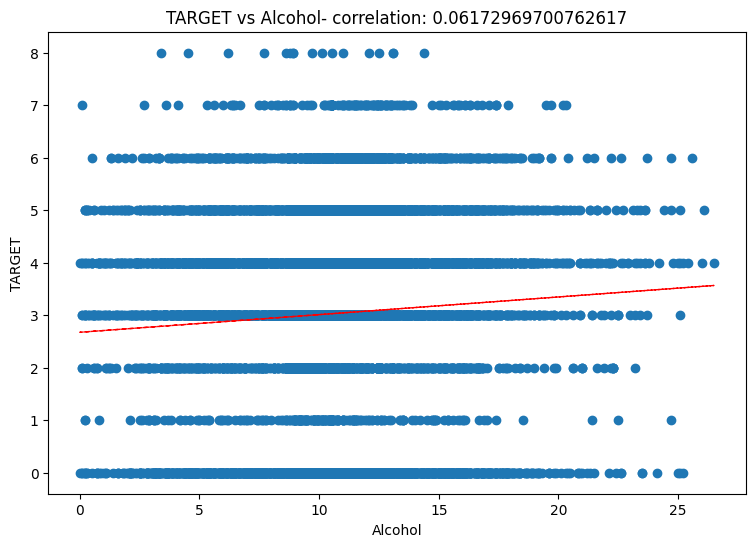

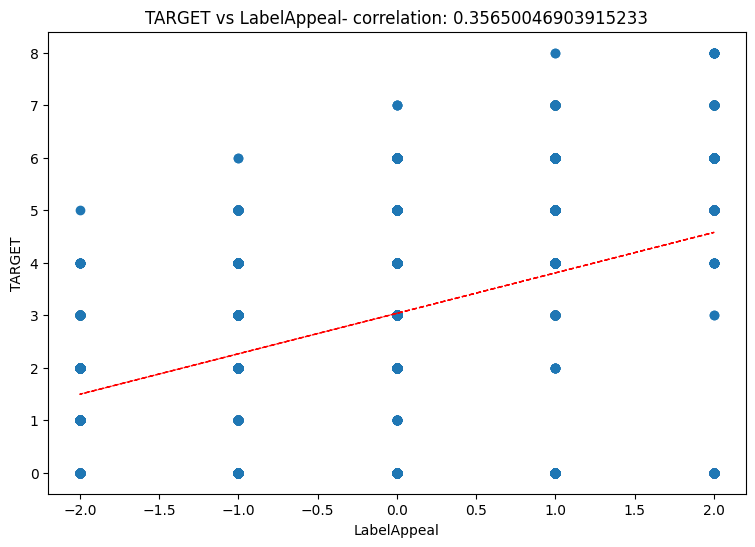

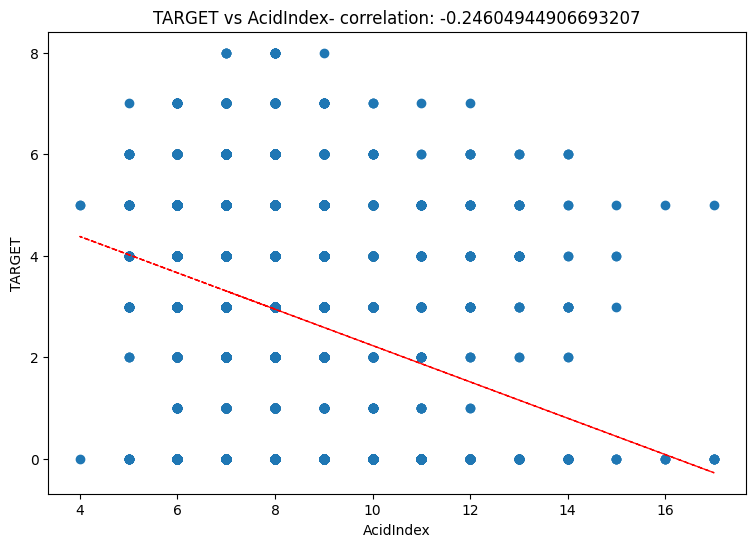

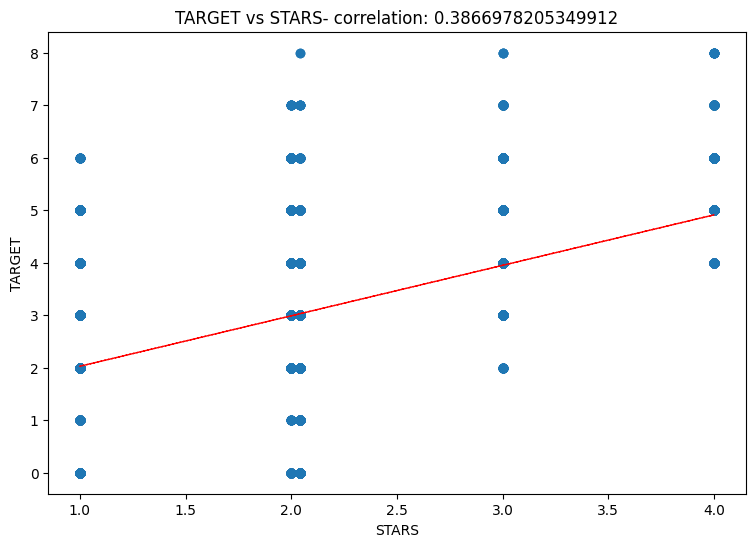

In [25]:
for col in df[:-1]:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]
        label = df['TARGET']
        correlation = feature.corr(label)
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel('TARGET')
        ax.set_title('TARGET vs ' + col + '- correlation: ' + str(correlation))
        z = np.polyfit(df[col], df['TARGET'], 1)
        y_hat = np.poly1d(z)(df[col])

        plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

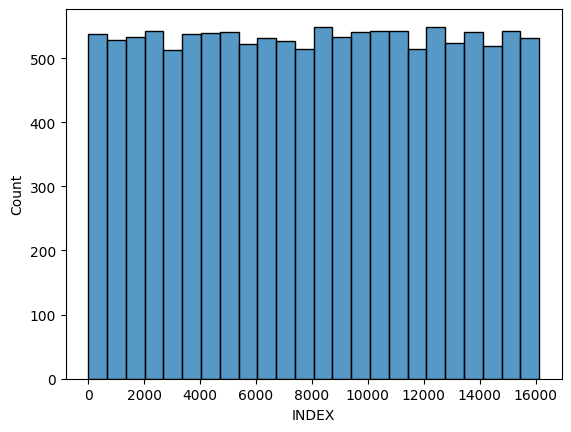

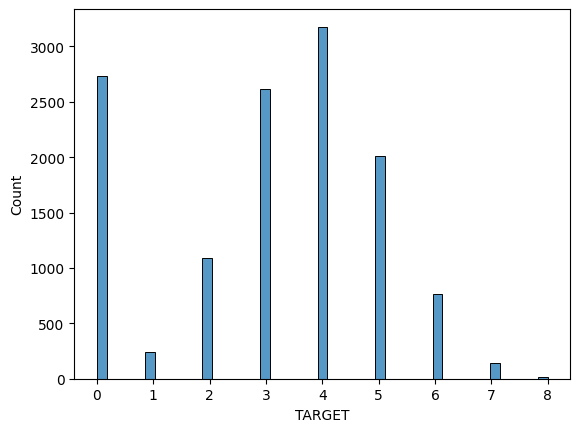

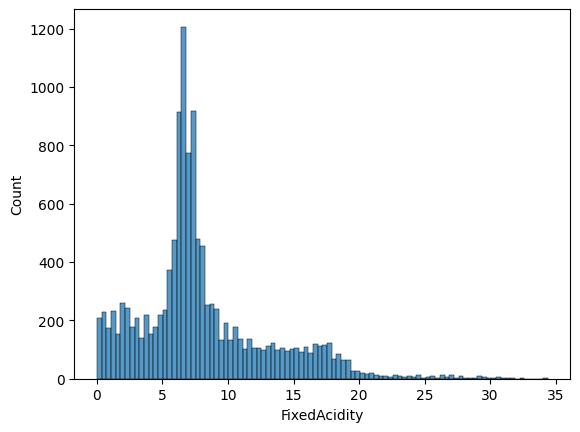

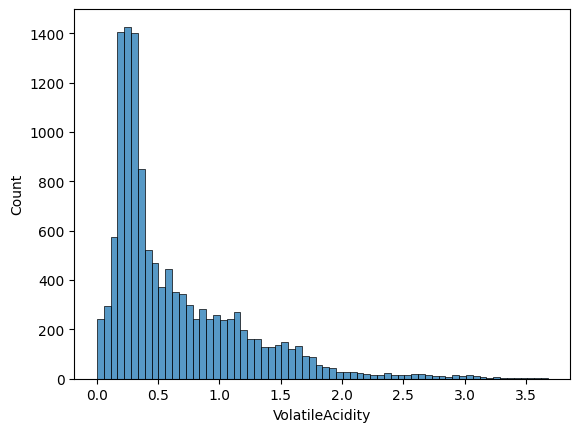

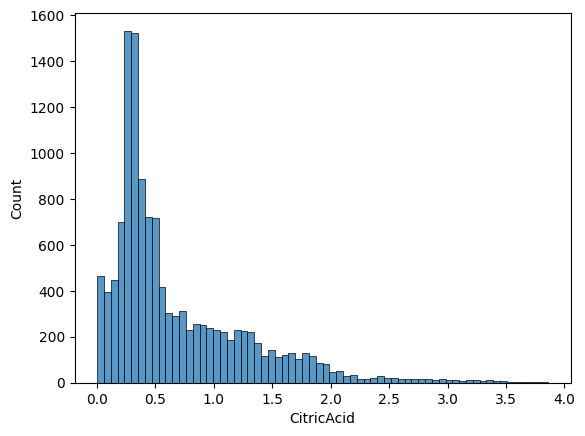

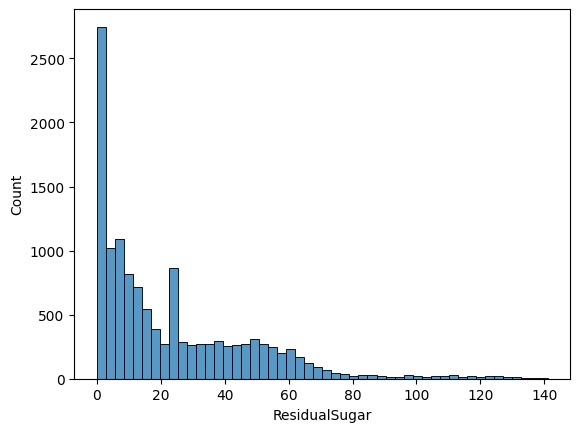

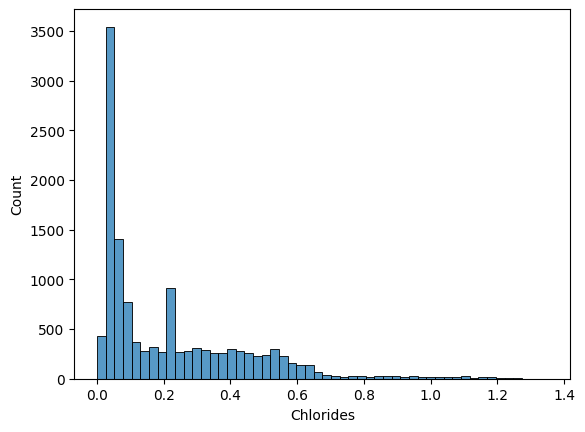

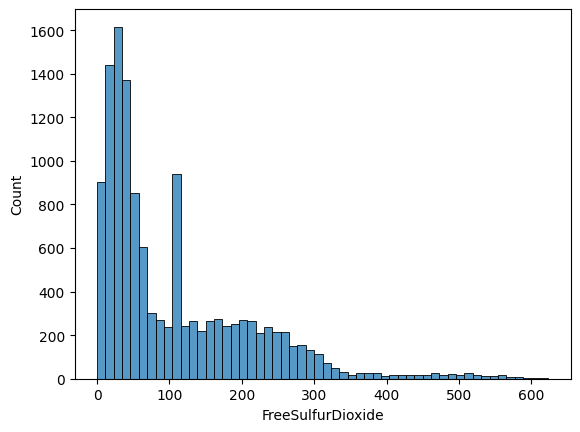

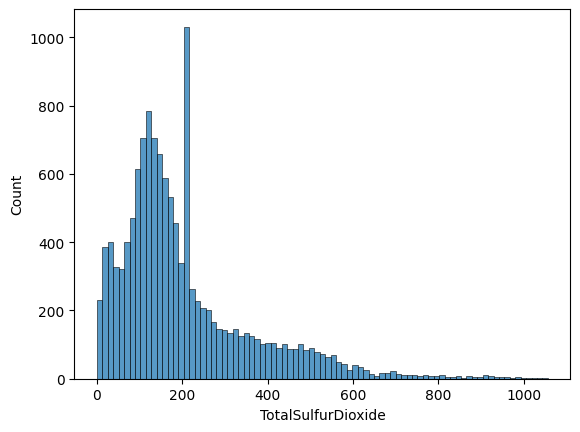

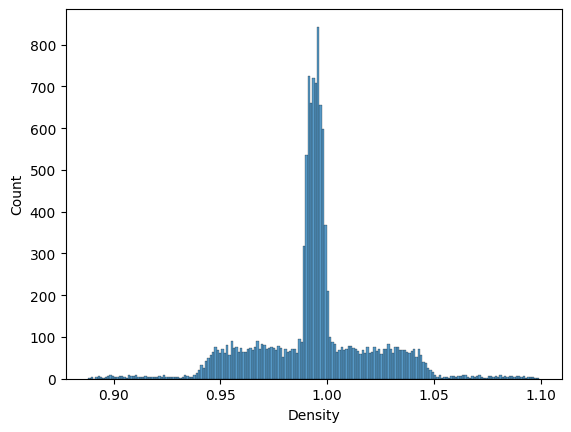

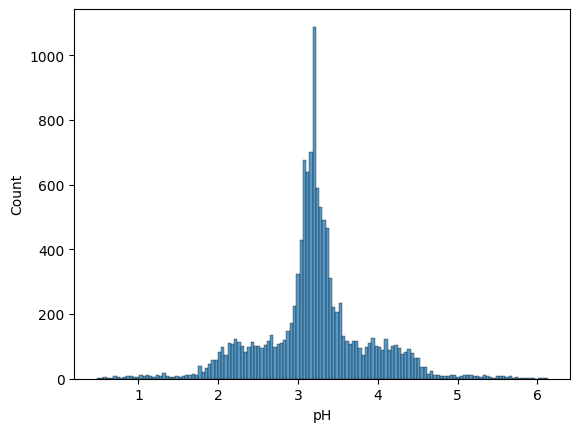

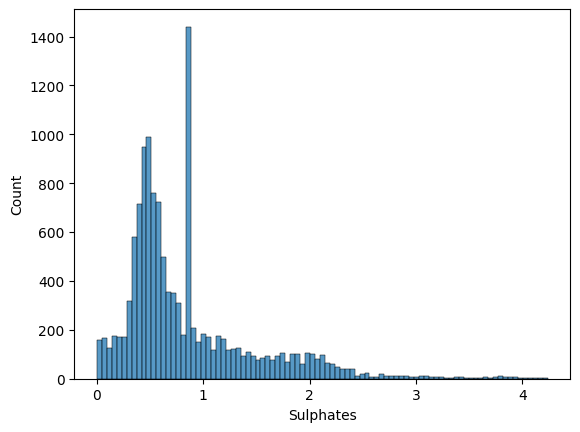

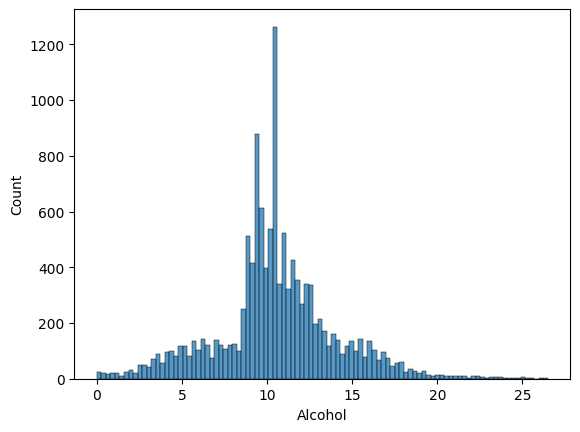

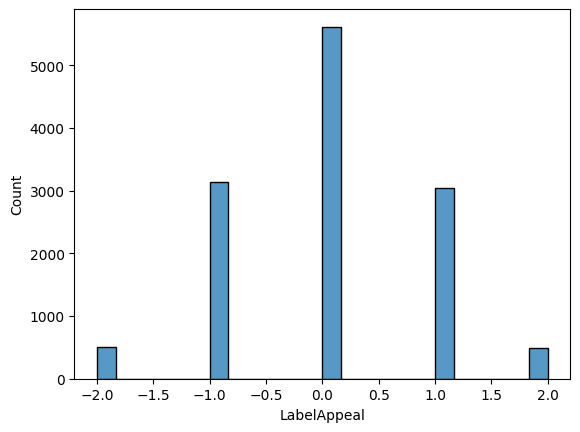

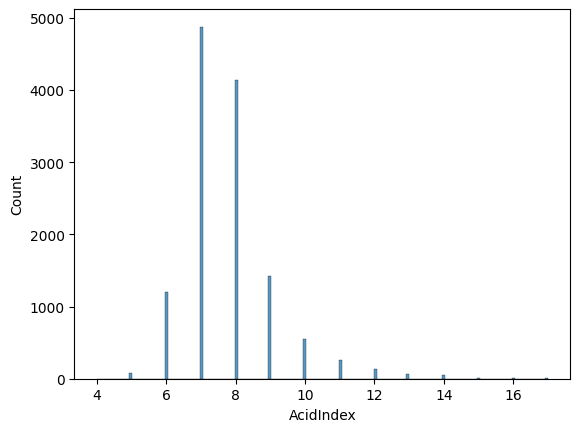

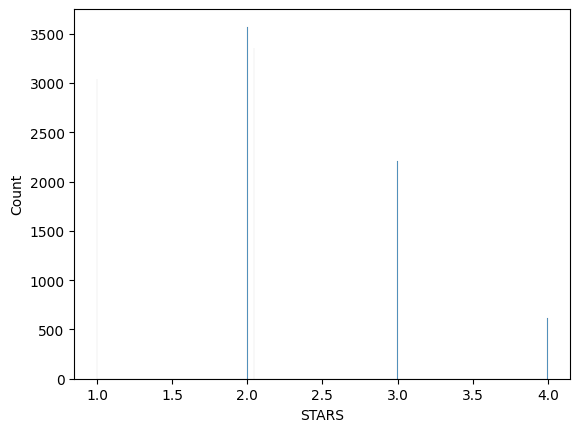

In [26]:
def hist():
        for col in df[:-1]:
            sns.histplot(data=df, x=col)
            plt.show()
hist()

In [27]:


# Alcohol Content Category
def categorize_alcohol_content(alcohol):
    if alcohol < 10:
        return 'Low'
    elif alcohol >= 10 and alcohol < 13:
        return 'Medium'
    else:
        return 'High'

df['AlcoholCategory'] = df['Alcohol'].apply(categorize_alcohol_content)

# pH Level Category
def categorize_ph_level(ph):
    if ph < 3.5:
        return 'Acidic'
    elif ph >= 3.5 and ph < 4:
        return 'Neutral'
    else:
        return 'Alkaline'

df['PHLevelCategory'] = df['pH'].apply(categorize_ph_level)

# Define the function to categorize ratings into three categories
def categorize_rating(stars):
    if stars < 2:
        return 'Poor'
    elif stars >= 2 and stars <= 4:
        return 'Medium'
    else:
        return 'Excellent'

# Apply the categorization function to create a new column for rating categories
df['RatingCategory'] = df['STARS'].apply(categorize_rating)

# Display the first few rows to verify the new column
print(df[['STARS', 'RatingCategory']].head())




   STARS RatingCategory
0    2.0         Medium
1    3.0         Medium
2    3.0         Medium
3    1.0           Poor
4    2.0         Medium


In [28]:
numeric_features=df.describe().columns
numeric_features

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

In [29]:
categorical_features = df.describe(include=['object']).columns

categorical_features

Index(['AlcoholCategory', 'PHLevelCategory', 'RatingCategory'], dtype='object')

In [30]:
df = pd.get_dummies(df,columns=categorical_features)

In [31]:
df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,...,AcidIndex,STARS,AlcoholCategory_High,AlcoholCategory_Low,AlcoholCategory_Medium,PHLevelCategory_Acidic,PHLevelCategory_Alkaline,PHLevelCategory_Neutral,RatingCategory_Medium,RatingCategory_Poor
0,1,3,3.2,1.160,0.98,54.200000,0.567000,106.679042,268.00000,0.99280,...,8,2.000000,0,1,0,1,0,0,1,0
1,2,3,4.5,0.160,0.81,26.100000,0.425000,15.000000,327.00000,1.02792,...,7,3.000000,0,0,1,1,0,0,1,0
2,4,5,7.1,2.640,0.88,14.800000,0.037000,214.000000,142.00000,0.99518,...,8,3.000000,1,0,0,1,0,0,1,0
3,5,3,5.7,0.385,0.04,18.800000,0.425000,22.000000,115.00000,0.99640,...,6,1.000000,0,1,0,1,0,0,0,1
4,6,4,8.0,0.330,1.26,9.400000,0.222559,167.000000,108.00000,0.99457,...,9,2.000000,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.000000,0.043000,17.000000,101.00000,1.01077,...,5,2.041755,0,1,0,1,0,0,1,0
12791,16123,5,8.9,0.470,0.29,84.900000,0.259000,54.000000,204.31912,0.99518,...,8,2.000000,0,0,1,0,1,0,1,0
12792,16127,4,6.0,0.170,1.10,37.000000,0.078000,25.000000,108.00000,0.99076,...,6,2.000000,0,0,1,1,0,0,1,0
12793,16128,3,7.7,0.320,0.12,23.367809,0.029000,26.000000,274.00000,0.99060,...,6,2.000000,0,0,1,0,0,1,1,0


In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
normalized_data = scaler.fit_transform(df)

# Convert the normalized data array back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

# Display the normalized DataFrame
print(normalized_df)

          INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0      0.000000   0.375      0.093023         0.315217    0.253886   
1      0.000062   0.375      0.130814         0.043478    0.209845   
2      0.000186   0.625      0.206395         0.717391    0.227979   
3      0.000248   0.375      0.165698         0.104620    0.010363   
4      0.000310   0.500      0.232558         0.089674    0.326425   
...         ...     ...           ...              ...         ...   
12790  0.999442   0.000      0.145349         0.214674    0.520725   
12791  0.999628   0.625      0.258721         0.127717    0.075130   
12792  0.999876   0.500      0.174419         0.046196    0.284974   
12793  0.999938   0.375      0.223837         0.086957    0.031088   
12794  1.000000   0.500      0.151163         0.010870    0.209845   

       ResidualSugar  Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  \
0           0.383989   0.419689           0.171234            0.253548   
1          

# Conclusions

In this project, we successfully cleaned and prepared the dataset containing information on wines.

Key steps taken during the data preparation process included handling missing values, dealing with outliers, performing data transformation, and feature engineering.

The prepped data is now ready for further analysis and modeling. It has been standardized, and potential features for modeling have been created. The data is now more suitable for building predictive models to understand factors influencing wine sales.

Further analysis and modeling can be conducted using this prepped dataset to derive valuable insights for the wine industry.
